<a href="https://colab.research.google.com/github/Magnusrm/TDAT3025-Machine-Learning/blob/master/Task1.1/oppg_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W0827 09:34:12.171692 140704702723968 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[[ 889.          209.         1838.         ...  156.
   450.          348.        ]
 [  49.98988629   42.73974526   50.93172234 ...   41.3450777
    46.95054869   44.59482334]]
W = [[0.00259149]], b = [[-8.7575845e-06]], loss = 2.6774292
w: [[0.00259149]]  b: [[-8.7575845e-06]]
[[   2.]
 [ 102.]
 [ 202.]
 [ 302.]
 [ 402.]
 [ 502.]
 [ 602.]
 [ 702.]
 [ 802.]
 [ 902.]
 [1002.]
 [1102.]
 [1202.]
 [1302.]
 [1402.]
 [1502.]
 [1602.]
 [1702.]
 [1802.]]
loss: 2.677428935296977


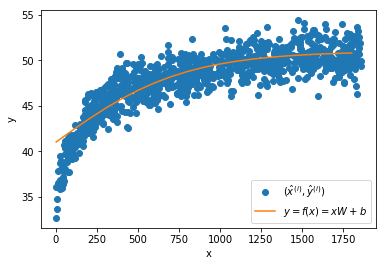

In [0]:
from math import exp, e
from matplotlib import pyplot as plt

import numpy as np
import tensorflow as tf
import pandas as pd

data = np.array(pd.read_csv( "https://gitlab.com/ntnu-tdat3025/regression/childgrowth-datasets/raw/master/day_head_circumference.csv")).transpose()
print(data)
# Observed/training input and output
x_train = np.expand_dims(data[0], 1)
y_train = np.expand_dims(data[1], 1)


class LinearRegressionModel:
    def __init__(self):
        # Model input
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)
        # Model variables
        self.W = tf.Variable([[0.0]])
        self.b = tf.Variable([[0.0]])
        # Predictor
        #f = tf.matmul(self.x, self.W) + self.b
        # x = xW+b
        f = 20 * (1 / (1 + e**((-1) * (tf.matmul(self.x, self.W) + self.b)))) + 31
        # Uses Mean Squared Error
        #self.loss = tf.losses.mean_squared_error(f, self.y)
        self.loss = tf.reduce_mean(tf.square(f - self.y))
        

model = LinearRegressionModel()

# Training: adjust the model so that its loss is minimized
minimize_operation = tf.train.GradientDescentOptimizer(0.000000001).minimize(model.loss)

# Create session object for running TF operations
session = tf.Session()

# Init tf.Variable objects
session.run(tf.global_variables_initializer())

for epoch in range(10000):
    session.run(minimize_operation, {model.x: x_train, model.y: y_train})

# Evaluate training accuracy
W, b, loss = session.run([model.W, model.b, model.loss], {model.x: x_train, model.y: y_train})
print("W = %s, b = %s, loss = %s" % (W, b, loss))

session.close()

print("w: %s  b: %s" % (W, b))

fig, ax = plt.subplots()

ax.plot(x_train, y_train, 'o', label='$(\\hat x^{(i)},\\hat y^{(i)})$')
ax.set_xlabel('x')
ax.set_ylabel('y')

class NonLinearRegressionModel:
    def __init__(self, W, b):
        self.W = W
        self.b = b

    # Predictor
    def f(self, x):
        return 20 * self.g(np.matmul(x, self.W) + self.b) + 31
        #return x * self.W + self.b

    def g(self, z):
        return 1 / (1 + np.exp(-z))

    # Mean Squared Error
    def loss(self, x, y):
        return np.mean(np.square(self.f(x) - y))


model = NonLinearRegressionModel(np.mat(W), np.mat(b))

x = np.expand_dims(np.arange(np.min(x_train), np.max(x_train), 100), 1)
print(x)
#x = np.mat([[np.min(x_train)], [np.max(x_train)]])
ax.plot(x, model.f(x), label='$y = f(x) = xW+b$')

print('loss:', model.loss(x_train, y_train))

ax.legend()
plt.show()

